# Skin Cancer Classification using deep learning model named SkinNet-8 on pre-processed dermoscopic images

Skin Cancer is the most common type of cancer. It develops in the body due to the abnormal growth of skin cells. According to the statistics, it caused over 1 million deaths each month worldwide. Early detection and diagnosis of the patient create the best chance for long time survival. *The dataset utlized for this study: https://challenge.isic-archive.com/data/#2020*

It consists of two classes:

- Benign 
- Malignant 

In [1]:
!nvidia-smi

Thu Nov 24 19:45:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.98       Driver Version: 526.98       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:26:00.0  On |                  N/A |
|  0%   49C    P8    12W / 170W |    465MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Experimental Configuration

- CPU: AMD Ryzen™ 5 5600X 6 Core Processor
- RAM: 16 GB
- GPU: Nvidia GeForce RTX 3060 (12GB dedicated GPU Memory)

# SkinNet-8 

We configure a shallow CNN model with 10 layers where 5 convolutional layers and 3 pooling layers are utilized for feature extraction purpose. The rest 2 layers are regarded as output layer with softmax activation function to classify the image in appropriate class.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 51, 32)        1

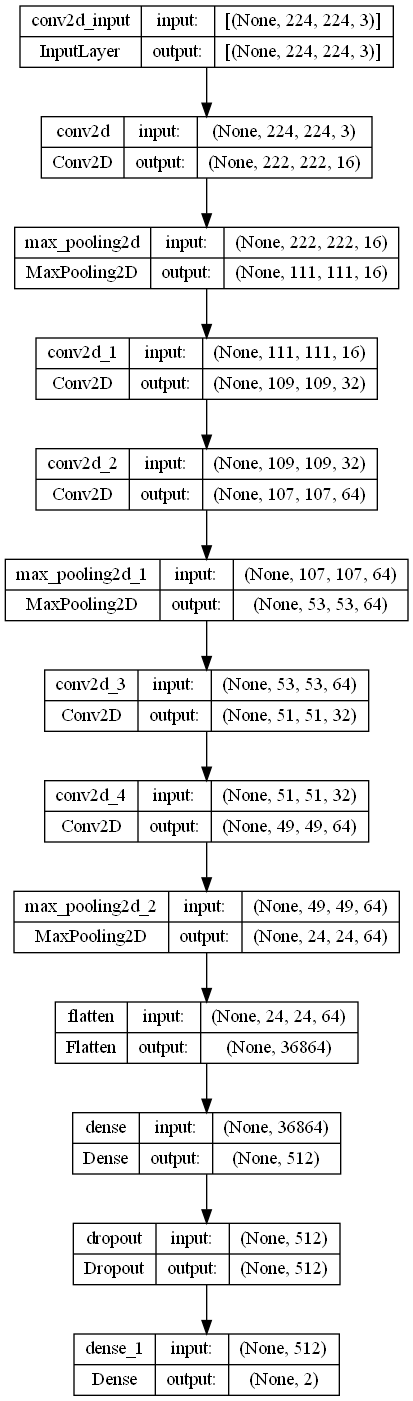

In [2]:
### model

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from glob import glob
from tensorflow.keras.utils import plot_model
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

class_num = 2



model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, to_file='BaseModel2.png')

# Details about Optimizer, Learning Rate and Loss function

We applied *categorical_crossentropy* loss function to determine the prediction of our model. Then, the effective *Adam* optimizer is used to minimize our Loss function. The optimal Learning rate value for our model is *0.0001*. 

In [3]:
op = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)

# Training Period : *Batch Size = 32, Input image size = 224 for training, test and validation*

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  brightness_range=(0.4, 0.7),
                                  vertical_flip= True,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'D:\SKIN CANCER\SkinAug\train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(r'D:\SKIN CANCER\SkinAug\val',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r'D:\SKIN CANCER\SkinAug\test',
                                           target_size = (224,224),
                                           batch_size = 1,
                                           class_mode = 'categorical')



model.optimizer.get_config()

Found 16871 images belonging to 2 classes.
Found 3615 images belonging to 2 classes.
Found 3618 images belonging to 2 classes.


{'name': 'Adam',
 'learning_rate': 0.0001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

# Model training with *100 epochs*

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

filepath = r"D:\Visual Disorders\Weights\Skin1.h5"



checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

log_csv = CSVLogger(r'D:\Visual Disorders\CSV\Skin1.csv', separator=',', append=False)

callbacks_list = [checkpoint1, log_csv]



r = model.fit_generator(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
    

)

C:\Users\USER\AppData\Local\Temp\ipykernel_2096\1530413393.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
528/528 [==============================] - ETA: 0s - loss: 0.5395 - accuracy: 0.7185
Epoch 1: val_accuracy improved from -inf to 0.72697, saving model to D:\Visual Disorders\Weights\Skin1.h5
528/528 [==============================] - 272s 509ms/step - loss: 0.5395 - accuracy: 0.7185 - val_loss: 0.5836 - val_accuracy: 0.7270
Epoch 2/100
527/528 [============================>.] - ETA: 0s - loss: 0.4542 - accuracy: 0.7763
Epoch 2: val_accuracy improved from 0.72697 to 0.77427, saving model to D:\Visual Disorders\Weights\Skin1.h5
528/528 [==============================] - 239s 453ms/step - loss: 0.4541 - accuracy: 0.7764 - val_loss: 0.5406 - val_accuracy: 0.7743
Epoch 3/100
527/528 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8010
Epoch 3: val_accuracy improved from 0.77427 to 0.79198, saving model to D:\Visual Disorders\Weights\Skin1.h5
528/528 [==============================] - 240s 454ms/step - loss: 0.4091 - accuracy: 0.8010 - val_loss: 0.5513 - v

# Training and Validation Accuracy Curve and Training and Validation Loss Curve

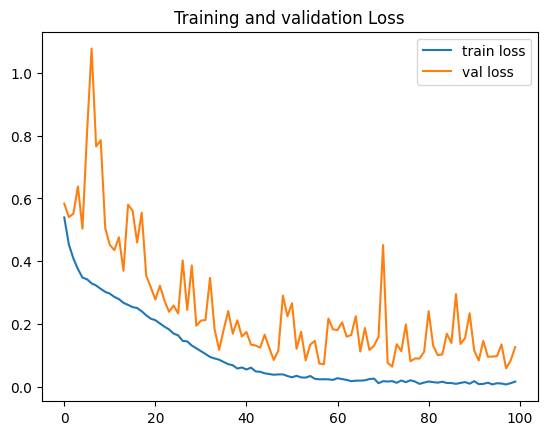

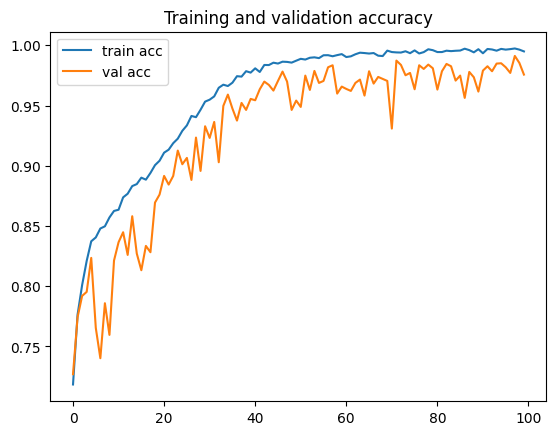

<Figure size 640x480 with 0 Axes>

In [6]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Results of Test Accuracy and Loss 

In [7]:
model.load_weights(filepath)
Adam = keras.optimizers.Adam(lr=0.0001)


preds = model.evaluate_generator(test_set)
print ("Loss = ",float(preds[0]))
print ("Test Accuracy = ",float(preds[1])*100)

C:\Users\USER\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_2096\3803211340.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = model.evaluate_generator(test_set)


Loss =  0.07906052470207214
Test Accuracy =  98.81149530410767


# Confusion Matrix

In [8]:
### for f1 score and other values import files ### 

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### matrics
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

1/1 [==============================] - 0s 12ms/step


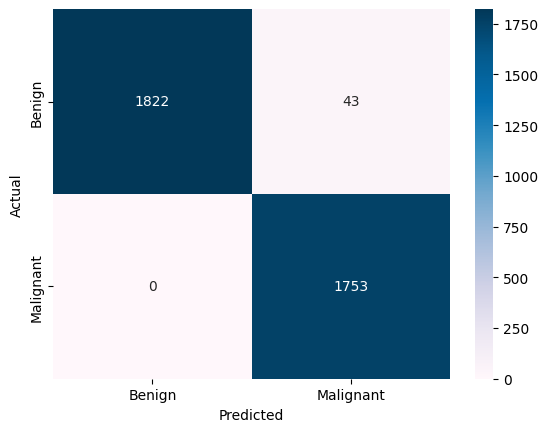

In [9]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights(filepath)
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='PuBu', annot=True, fmt='d')
plt.show()